In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv(r"Sentimentanalysis")
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...


In [3]:
df.shape

(568454, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   ReviewSummary           568454 non-null  object
 9   ReviewText              568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.isnull().sum() 

Unnamed: 0                0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [6]:
# creating the new text column that combines both review summary and review text
df["text"]=df["ReviewSummary"]+" "+df["ReviewText"]
df.head() 

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,text
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Good Quality Dog Food I have bought several ...
1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,Not as Advertised Product arrived labeled as...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,"""Delight"" says it all This is a confection t..."
3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,Cough Medicine If you are looking for the se...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,Great taffy Great taffy at a great price. T...


In [7]:
df.columns=['UniqueRowNo', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'ReviewText','text']

In [8]:
#making the unique row number column
df["UniqueRowNo"]=np.arange(1,df.shape[0]+1) 

In [9]:
df.head() 

,UniqueRowNo,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Good Quality Dog Food I have bought several ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,Not as Advertised Product arrived labeled as...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,"""Delight"" says it all This is a confection t..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,Cough Medicine If you are looking for the se...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,Great taffy Great taffy at a great price. T...


In [10]:
#creating helpfulness column which is the fraction of HelpFulnessNumerator and HelpfulnessDenominator
df["Helpfulness"]=df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]

In [11]:
df['Helpfulness'].head()

0    1.0
1    NaN
2    1.0
3    1.0
4    NaN
Name: Helpfulness, dtype: float64

In [12]:
#here we can see that helpfulness fraction contains nan,this is because 0/0 is not defined
# we can replace nan with zero
df["Helpfulness"]=df["Helpfulness"].replace(np.nan,0)
df["Helpfulness"] 

0         1.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
568449    0.0
568450    0.0
568451    1.0
568452    1.0
568453    0.0
Name: Helpfulness, Length: 568454, dtype: float64

In [13]:
#The HelpfulnessNumerator
print("Minimum value of Helpfulness",df["Helpfulness"].min())
print("Maximum value of Helpfulness",df["Helpfulness"].max())
print("Average value of Helpfulness",df["Helpfulness"].mean())
print("Standard deviation of Helpfulness",df["Helpfulness"].std()) 

Minimum value of Helpfulness 0.0
Maximum value of Helpfulness 3.0
Average value of Helpfulness 0.4078619474101317
Standard deviation of Helpfulness 0.46206838814307344


(array([3.11171e+05, 3.21600e+04, 3.55760e+04, 1.89545e+05, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

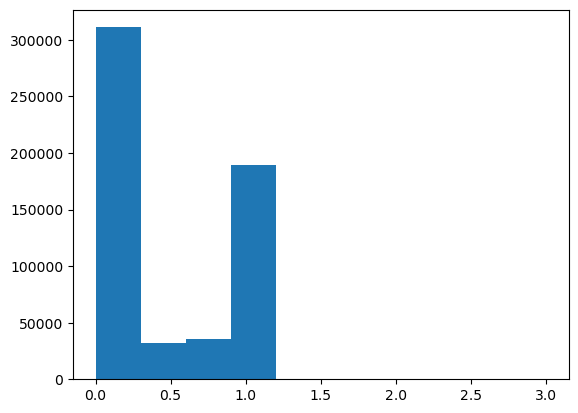

In [14]:
#distribution of helpfulness
plt.hist(df["Helpfulness"])

In [15]:
#creating a function to label Helpfulness
def helpful(value):
    if value>0.5:
        return ">0.5"
    elif value<0.5 and value>0.25:
        return "<0.5"
    else:
        return "Useless"
    

    

In [16]:
from tqdm import tqdm, tqdm_notebook

In [17]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [18]:
#creating new column for label encoding the helpfuness column
df["HelpfulnessLabel"]=df["Helpfulness"].progress_apply(lambda x:helpful(x)) 

100%|██████████████████████████████████████████████████████████████████████| 568454/568454 [00:01<00:00, 526409.67it/s]


In [19]:
df.head()

,UniqueRowNo,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,text,Helpfulness,HelpfulnessLabel
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Good Quality Dog Food I have bought several ...,1.0,>0.5
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,Not as Advertised Product arrived labeled as...,0.0,Useless
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,"""Delight"" says it all This is a confection t...",1.0,>0.5
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,Cough Medicine If you are looking for the se...,1.0,>0.5
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,Great taffy Great taffy at a great price. T...,0.0,Useless


In [20]:
df.shape

(568454, 13)

### machine learning 

In [21]:
X=df[["text"]]
y=df[["Score"]]  

In [22]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52) 

In [23]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape) 

(426340, 1) (426340, 1)
(142114, 1) (142114, 1)


In [24]:
import nltk
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
##  Lemmatizer
lemmatizer = WordNetLemmatizer() 

In [27]:
def preprocess(raw_text):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]

    # Lemmatization

    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [28]:
#concatenating the x train and  y train
train_data=pd.concat([X_train,y_train],axis=1)
train_data.head()

,text,Score
337276,Good Taste. I might buy it again. First time...,4
408872,THE ONLY THING MY 3-YEAR-OLD WILL EAT FOR BRE...,5
6238,great taste This BBQ Glaze Shake'N'Bake is g...,5
109842,Bold yet not too bitter This coffee is BOLD....,5
105103,"my kids love it This is a great cereal, both...",4


In [8]:
train_data=pd.read_csv("cleaned_train_data.csv")
train_data.head()

,Unnamed: 0,text,Score
0,337276,Good Taste. I might buy it again. First time...,4
1,408872,THE ONLY THING MY 3-YEAR-OLD WILL EAT FOR BRE...,5
2,6238,great taste This BBQ Glaze Shake'N'Bake is g...,5
3,109842,Bold yet not too bitter This coffee is BOLD....,5
4,105103,"my kids love it This is a great cereal, both...",4


In [9]:
train_data.shape

(426340, 3)

In [10]:
train_data.isnull().sum() 

Unnamed: 0    0
text          0
Score         0
dtype: int64

In [11]:
#seperating X train and y train
X_train=train_data["text"]
y_train=train_data["Score"]

In [12]:
X_train 

0          Good Taste. I might buy it again.  First time...
1          THE ONLY THING MY 3-YEAR-OLD WILL EAT FOR BRE...
2          great taste  This BBQ Glaze Shake'N'Bake is g...
3          Bold yet not too bitter  This coffee is BOLD....
4          my kids love it  This is a great cereal, both...
                                ...                        
426335     French Roast in a K Cup  Green Mountain Frenc...
426336     YUM! If you want a snack, have something REAL...
426337     Calebaut chocolate callets (drops)  Calebaut ...
426338     I can't  My purchase never arrived. And no on...
426339     old, brittle, dry bars  the bars i received a...
Name: text, Length: 426340, dtype: object

In [16]:
test_data=pd.read_csv("cleaned_test_data.csv")
test_data.head() 

,Unnamed: 0,text,Score,cleaned_text,len_cleaned_text
0,479184,Hard to find The Bresaola Dry Cure Meat is v...,4,hard find bresaola dry cure meat good excellen...,14
1,304707,Great Taste Everyone in our family liked the...,5,great taste everyone family liked chip great t...,15
2,92911,Be prepared to add ingredients like broccoli ...,3,prepared add ingredient like broccoli quick me...,74
3,365944,Great product I was searching for a Horlicks...,5,great product searching horlicks type powder p...,33
4,85239,"Great taste, great value @ $2/bottle! Gamble...",4,great taste great value bottle gambled bought ...,19


In [17]:
test_data.shape

(142114, 5)

In [18]:
test_data.isnull().sum()

Unnamed: 0          0
text                0
Score               0
cleaned_text        0
len_cleaned_text    0
dtype: int64

In [19]:
#seperating X_test and y_test from above data
X_test=test_data["cleaned_text"]
y_test=test_data["Score"]

In [20]:
#transforming the test data
# using the same vocab instance of TfidfCountVectorizer to only transform the xtest data
X_test_transformed = vocab.transform(X_test)  

#### Model buiding 

In [1]:
import time

In [2]:
import sys

In [23]:
#!pip install memory-profiler  

In [25]:
import joblib


['LG_classifier.pkl']

In [3]:
import os

#### Using Tfidf

In [45]:
#aaplying transformation on x train
from sklearn.feature_extraction.text import TfidfVectorizer

vocab =  TfidfVectorizer()

X_train_transformed = vocab.fit_transform(X_train)


In [46]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_transformed))

print("Shape of input data:", X_train_transformed.shape)

Total unique words: 111001
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (426340, 111001)


In [47]:
#transforming the test data
# using the same vocab instance of TfidfCountVectorizer to only transform the xtest data
X_test_transformed = vocab.transform(X_test)  

In [48]:
from sklearn.linear_model import LogisticRegression

LG_classifier=LogisticRegression()
st=time.time()
LG_classifier.fit(X_train_transformed,y_train)
et=time.time()
time_taken=et-st
print("The total time taken to train this model : ",time_taken)

The total time taken to train this model :  85.20000052452087


C:\Users\admin\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
joblib.dump(LG_classifier, 'LG_classifier_tfidf.pkl')
LG_classifier_size_bytes = os.path.getsize('LG_classifier_tfidf.pkl')
print(f"Model size (bytes): {LG_classifier_size_bytes}")


Model size (bytes): 4440883


In [50]:
st=time.time()
y_test_pred = LG_classifier.predict(X_test_transformed) 
et=time.time()
print("The total time taken for prediction : ",et-st)

The total time taken for prediction :  0.10703563690185547


In [51]:
from sklearn.metrics import accuracy_score

accuracy_LG=accuracy_score(y_test, y_test_pred)

print(accuracy_LG)

0.7381257300477082


In [52]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier=DecisionTreeClassifier()

st=time.time()
DT_classifier.fit(X_train_transformed,y_train)
et=time.time() 

print("The total time taken to train this model : ",et-st)


The total time taken to train this model :  5313.475463151932


In [53]:
#finding the size of the model
joblib.dump(DT_classifier, 'DT_classifier_tfidf.pkl')

DT_classifier_size_bytes = os.path.getsize('DT_classifier_tfidf.pkl')
print(f"Model size (bytes): {DT_classifier_size_bytes}")


Model size (bytes): 11200234


In [54]:
st=time.time()
y_test_pred = DT_classifier.predict(X_test_transformed) 
et=time.time()

print("The total time taken for prediction : ",et-st) 

The total time taken for prediction :  0.31589317321777344


In [55]:
from sklearn.metrics import accuracy_score

accuracy_DT=accuracy_score(y_test, y_test_pred)

print(accuracy_DT)

0.630655670799499


In [56]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier=RandomForestClassifier()

st=time.time()
RF_classifier.fit(X_train_transformed,y_train)
et=time.time() 

print("The total time taken to train this model : ",et-st)


The total time taken to train this model :  7953.580223798752


In [57]:
#finding the size of the model
joblib.dump(RF_classifier, 'RF_classifier_tfidf.pkl')

RF_classifier_size_bytes = os.path.getsize('RF_classifier_tfidf.pkl')
print(f"Model size (bytes): {RF_classifier_size_bytes}")

Model size (bytes): 2282750311


In [58]:
st=time.time()
y_test_pred = RF_classifier.predict(X_test_transformed) 
et=time.time()

print("The total time taken for prediction : ",et-st)

The total time taken for prediction :  15.880118131637573


In [59]:
from sklearn.metrics import accuracy_score

accuracy_RF=accuracy_score(y_test, y_test_pred)

print(accuracy_RF) 

0.6715453790618799


In [60]:
df_tfidf=pd.DataFrame({"Model":["LR_classifier","DT_classifier","RF_classifier"],
                     "Accuracy":[accuracy_LG,accuracy_DT,accuracy_RF],
                     "TrainingTime":[14.2476,2086.1053,2630.566],
                     "PredictionTime":[ 0.02633,0.38093,9.3310],
                     "size":[LG_classifier_size_bytes,DT_classifier_size_bytes,RF_classifier_size_bytes]})
df_tfidf.head()

,Model,Accuracy,TrainingTime,PredictionTime,size
0,LR_classifier,0.738126,14.2476,0.02633,4440883
1,DT_classifier,0.630656,2086.1053,0.38093,11200234
2,RF_classifier,0.671545,2630.5660,9.33100,2282750311


In [61]:
df_tfidf.to_csv("df_tfidf.csv")

In [20]:
df_tf=pd.read_csv("df_tfidf.csv")

In [21]:
df_tf.drop(columns=["Unnamed: 0"],inplace=True)

In [22]:

size_tf=[4337,10938,2229249]

In [23]:

df_tf["size"]=size_tf
df_tf["Accuracy"]=df_tf["Accuracy"]*100
df_tf.columns
df_tf.columns=['Model', 'Accuracy', 'TrainingTime', 'PredictionTime', 'size(kb)']
df_tf.head()

,Model,Accuracy,TrainingTime,PredictionTime,size(kb)
0,LR_classifier,73.812573,14.2476,0.02633,4337
1,DT_classifier,63.065567,2086.1053,0.38093,10938
2,RF_classifier,67.154538,2630.5660,9.33100,2229249


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

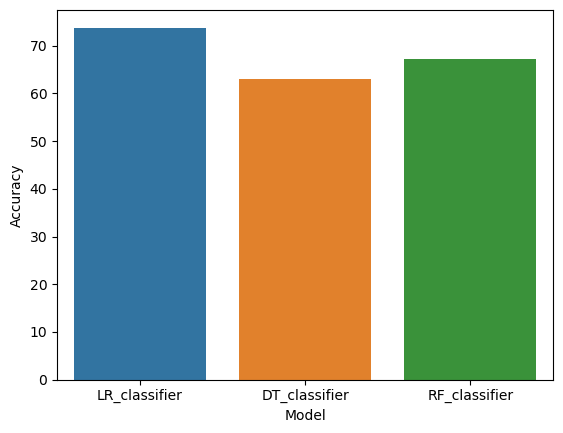

In [25]:
sns.barplot(data=df_tf,y="Accuracy",x="Model") 

<AxesSubplot:xlabel='Model', ylabel='TrainingTime'>

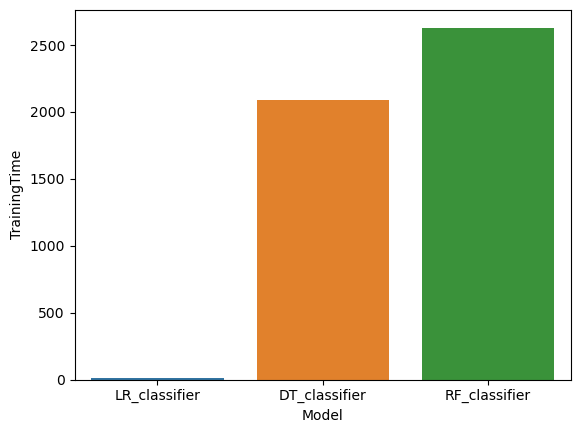

In [26]:
sns.barplot(data=df_tf,x="Model",y="TrainingTime")

<AxesSubplot:xlabel='Model', ylabel='PredictionTime'>

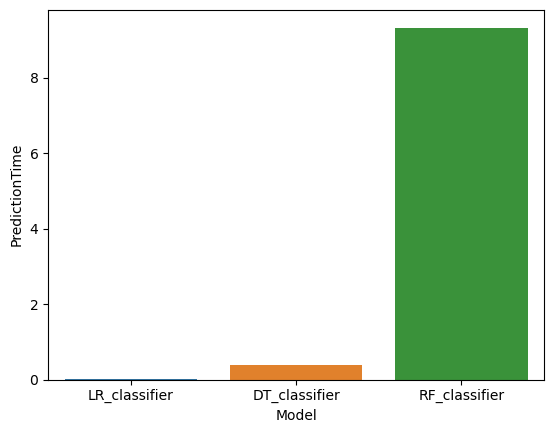

In [28]:
sns.barplot(data=df_tf,x="Model",y="PredictionTime")

<AxesSubplot:xlabel='size', ylabel='Model'>

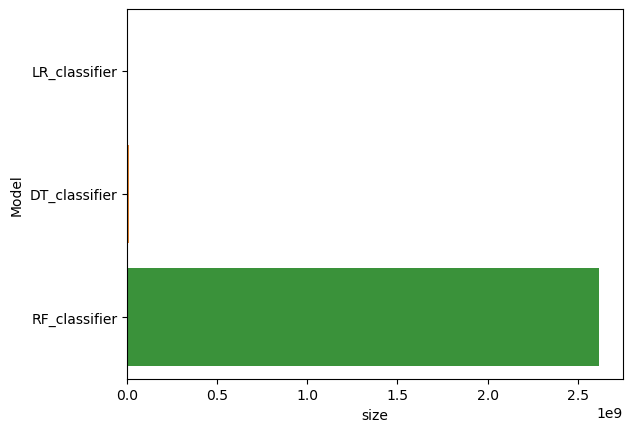

In [65]:
sns.barplot(data=df_bow,x="size",y="Model")

In [29]:
import pickle


In [30]:
#filename="trained_LR_model_sentiment.sav"
#pickle.dump(LG_classifier,open(filename,"wb"))


In [31]:
loaded_LR_model=pickle.load(open("trained_LR_model_sentiment.sav","rb"))

In [32]:
#vectorizer_filename="CountVectorizer.sav"
#pickle.dump(vocab,open(vectorizer_filename,"wb"))

In [33]:

loaded_vectorizer=pickle.load(open("CountVectorizer.sav","rb"))

In [37]:
 
# Text input for prediction


# Preprocess the text input (cleaning, tokenization, etc., if needed)
preprocessed_text =["good"]

# Vectorize the preprocessed text using the loaded TF-IDF vectorizer
text_vector = loaded_vectorizer.transform(preprocessed_text)

# Make predictions using the loaded model
sentiment_prediction = loaded_LR_model.predict(text_vector)

print(sentiment_prediction)     


[5]
